## Data Cleaning and Preprocessing

### Exploratory Data Analysis (EDA)

#### Descriptive Statistics

	• Summary statistics untuk key metrics
	• Distribution analysis
	• Correlation matrices
	• Time series patterns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


df = pd.read_csv("data/processed/F1_Integrated_Features.csv")

print(f"✅ Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()


✅ Data loaded: 26,519 rows × 60 columns


,resultid,raceid,driverid,constructorid,number_x,grid,position,positiontext,positionorder,points,laps,time_x,milliseconds,fastestlap,rank,fastestlaptime,fastestlapspeed,statusid,driverref,number_y,code,forename,surname,dob,nationality_x,url_driver_details,constructorref,name_x,nationality_y,url_team_details,year,round,circuitid,name_y,date,time_y,url_race_schedule,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitref,name,location,country,lat,lng,alt,url_track_information,finish_category,win_rate,podium_rate,avg_position,f1_era
0,1,18,1,1,22,1,1.0,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,win,0.302326,0.578488,3.568254,V8 Era
1,2,18,2,2,3,5,2.0,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,podium,0.000000,0.070652,8.355072,V8 Era
2,3,18,3,3,7,7,3.0,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,podium,0.111650,0.276699,6.355932,V8 Era
3,4,18,4,4,5,11,4.0,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,finish,0.081633,0.270408,6.349845,V8 Era
4,5,18,5,1,23,3,5.0,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,\N,NaN,\N,NaN,\N,NaN,\N,NaN,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,finish,0.008929,0.035714,11.835165,V8 Era


In [ ]:
summary_stats = df.describe().T
display(summary_stats)

metrics = ["grid", "position", "points", "fastestlapspeed"]
display(df[metrics].describe())


,count,mean,std,min,25%,50%,75%,max
resultid,26519.0,13260.940986,7656.813206,1.0000,6630.500000,13260.000000,19889.500000,26524.0000
raceid,26519.0,546.376560,309.642244,1.0000,298.000000,527.000000,803.000000,1132.0000
driverid,26519.0,274.357291,279.275606,1.0000,57.000000,170.000000,385.000000,860.0000
constructorid,26519.0,49.801161,61.091426,1.0000,6.000000,25.000000,60.000000,215.0000
grid,26519.0,11.145820,7.213453,0.0000,5.000000,11.000000,17.000000,34.0000
position,15591.0,7.999743,4.831278,1.0000,4.000000,7.000000,11.000000,33.0000
positionorder,26519.0,12.814812,7.677869,1.0000,6.000000,12.000000,18.000000,39.0000
points,26519.0,1.959578,4.306475,0.0000,0.000000,0.000000,2.000000,50.0000
laps,26519.0,46.228251,29.577860,0.0000,23.000000,53.000000,66.000000,200.0000
statusid,26519.0,17.317056,26.081700,1.0000,1.000000,10.000000,14.000000,141.0000


,grid,position,points
count,26519.000000,15591.000000,26519.000000
mean,11.145820,7.999743,1.959578
std,7.213453,4.831278,4.306475
min,0.000000,1.000000,0.000000
25%,5.000000,4.000000,0.000000
50%,11.000000,7.000000,0.000000
75%,17.000000,11.000000,2.000000
max,34.000000,33.000000,50.000000


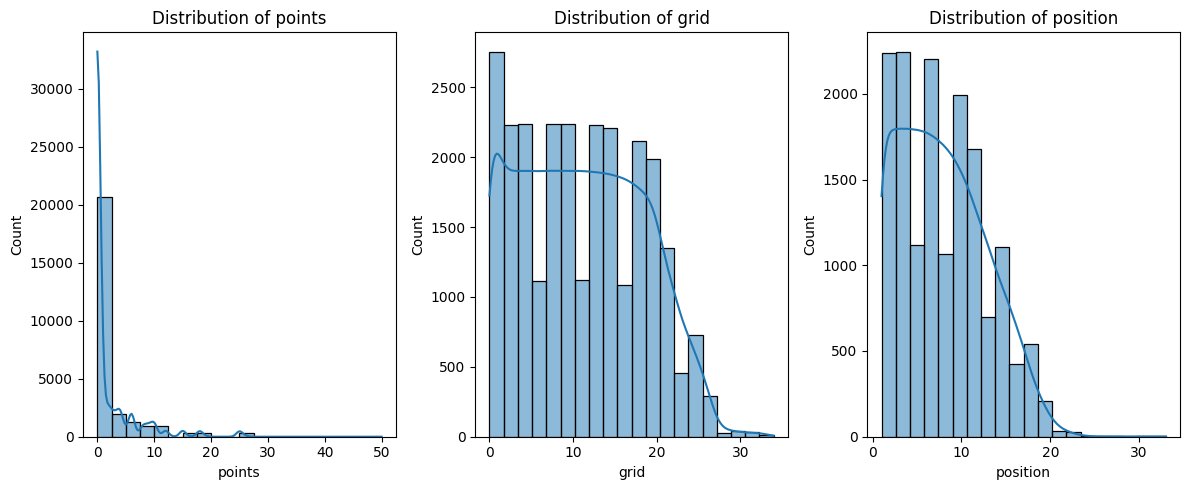

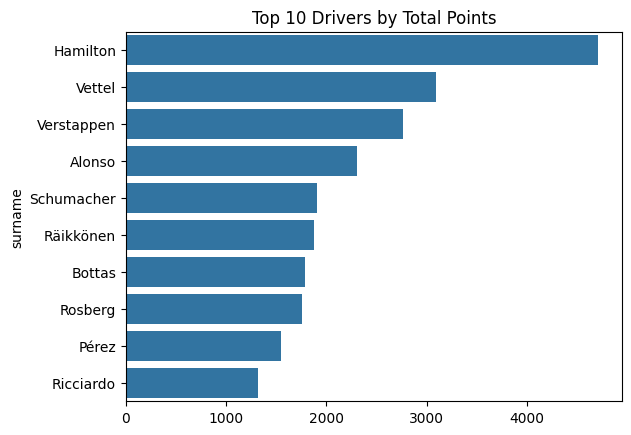

In [26]:
# Plot distributions
plt.figure(figsize=(12, 5))
for i, col in enumerate(["points", "grid", "position"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

top_drivers = df.groupby("surname")["points"].sum().nlargest(10)
sns.barplot(x=top_drivers.values, y=top_drivers.index)
plt.title("Top 10 Drivers by Total Points")
plt.show()


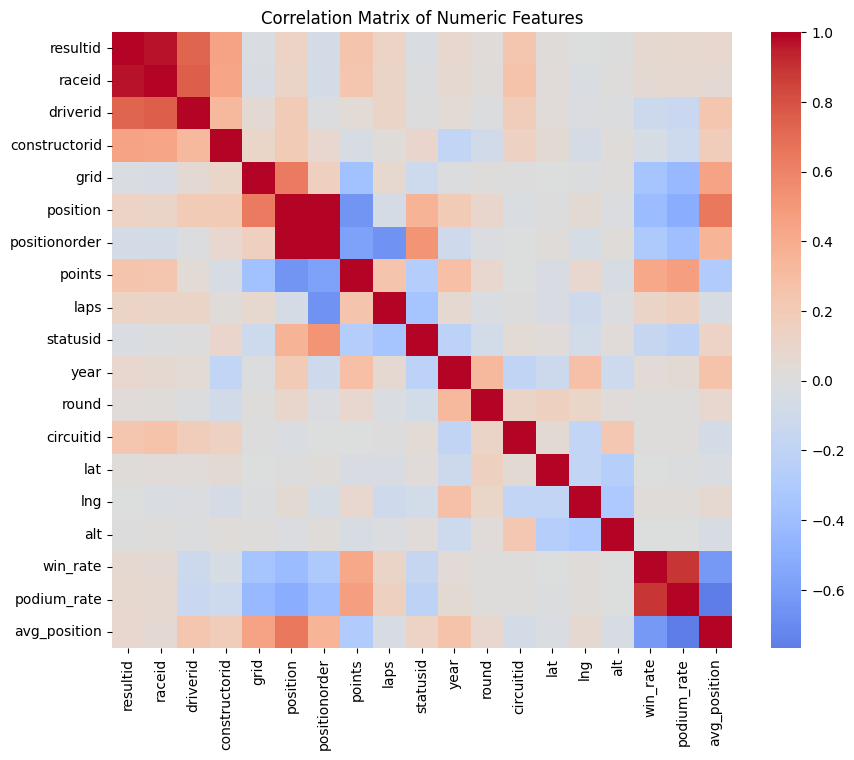

Correlation with 'points':
points         1.000000
podium_rate    0.469865
win_rate       0.425018
year           0.285709
laps           0.249624
resultid       0.249216
raceid         0.237716
round          0.086194
lng            0.080842
driverid       0.043002
Name: points, dtype: float64


In [27]:
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

corr_target = corr["points"].sort_values(ascending=False)
print("Correlation with 'points':")
print(corr_target.head(10))


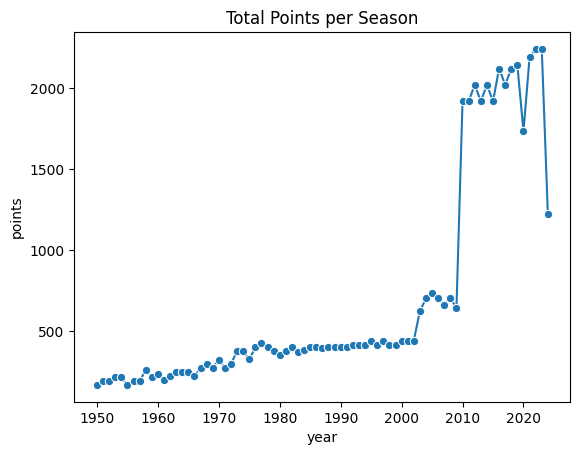

NameError: name 'top_names' is not defined

<Figure size 3000x1000 with 0 Axes>

In [ ]:
# Convert date to datetime 
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Points trend per season
if "year" in df.columns:
    season_points = df.groupby("year")["points"].sum().reset_index()
    sns.lineplot(data=season_points, x="year", y="points", marker="o")
    plt.title("Total Points per Season")
    plt.show()

driver_yearly = (
    df.groupby(["year", "surname"])["points"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(30, 10))  # Lebar 12 inch, tinggi 6 inch
sns.lineplot(
    data=driver_yearly[driver_yearly["surname"].isin(top_names)],
    x="year", y="points", hue="surname", marker="o"
)
plt.title("Points Trend by Top 5 Drivers")
plt.show()



#### Business Things

    Driver Analysis
    Constructor Analysis
    Race & Circuit Analysis
    Strategic Analysis


##### Driver Analysis


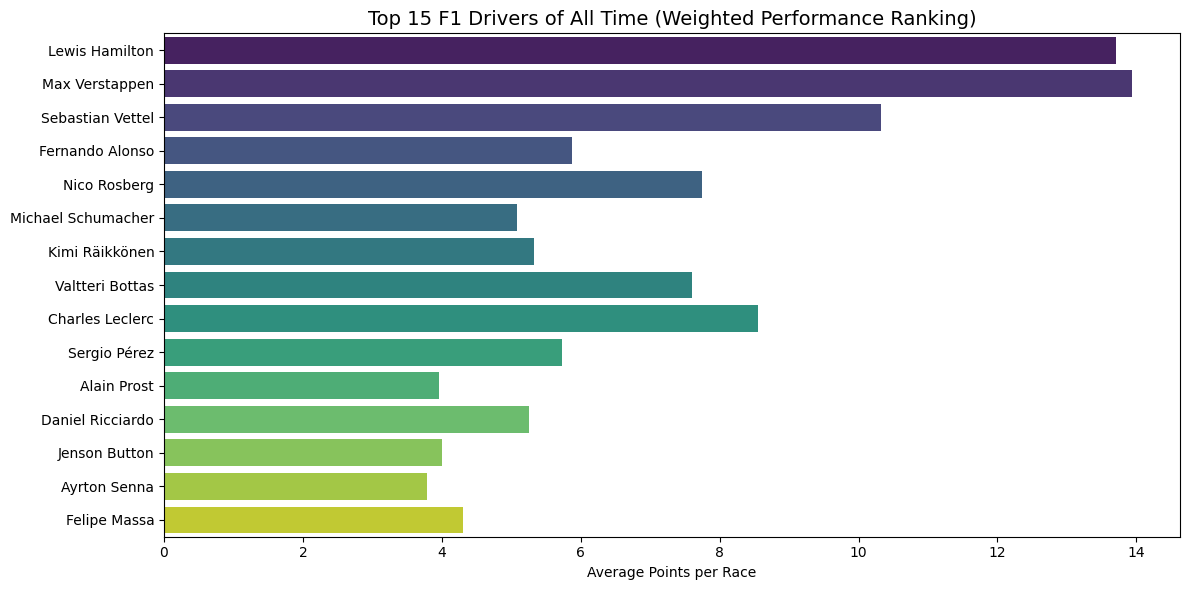

,Overall_Rank,Driver,nationality,total_points,total_wins,avg_points_per_race
0,1.0,Lewis Hamilton,British,4713.5,104,13.702035
828,2.0,Max Verstappen,Dutch,2744.5,61,13.931472
19,3.0,Sebastian Vettel,German,3098.0,53,10.326667
3,4.0,Fernando Alonso,Spanish,2304.0,32,5.877551
2,5.0,Nico Rosberg,German,1594.5,23,7.740291
29,6.0,Michael Schumacher,German,1566.0,91,5.084416
7,7.0,Kimi Räikkönen,Finnish,1873.0,21,5.321023
820,8.0,Valtteri Bottas,Finnish,1788.0,10,7.608511
842,9.0,Charles Leclerc,Monegasque,1172.0,6,8.554745
813,10.0,Sergio Pérez,Mexican,1552.0,6,5.726937


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
driver_details = pd.read_csv("data/processed/Driver_Details_clean.csv")

df["win"] = (df["position"] == 1).astype(int)
df["podium"] = (df["position"] <= 3).astype(int)

# Calculate performance metrics per driver
driver_perf = (
    df.groupby("driverid")
    .agg(
        total_points=("points", "sum"),
        total_wins=("win", "sum"),
        total_podiums=("podium", "sum"),
        total_races=("raceid", "count"),
    )
    .reset_index()
)

# Calculate the average points per race
driver_perf["avg_points_per_race"] = driver_perf["total_points"] / driver_perf["total_races"]

# Combine with the driver's name
driver_perf = driver_perf.merge(
    driver_details[["driverid", "forename", "surname", "nationality"]],
    on="driverid",
    how="left"
)
driver_perf["Driver"] = driver_perf["forename"] + " " + driver_perf["surname"]

driver_perf["Score"] = (
    driver_perf["total_points"].rank(ascending=False, method="dense") * 0.4
    + driver_perf["total_wins"].rank(ascending=False, method="dense") * 0.3
    + driver_perf["avg_points_per_race"].rank(ascending=False, method="dense") * 0.3
)
driver_perf["Overall_Rank"] = driver_perf["Score"].rank(ascending=True, method="dense")

# Select the 15 best drivers
top_drivers = driver_perf.sort_values("Overall_Rank").head(15)

# visualisation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_drivers,
    y="Driver",
    x="avg_points_per_race",
    palette="viridis"
)
plt.title("Top 15 F1 Drivers of All Time (Weighted Performance Ranking)", fontsize=14)
plt.xlabel("Average Points per Race")
plt.ylabel("")
plt.tight_layout()
plt.show()

# preview
display(top_drivers[["Overall_Rank", "Driver", "nationality", "total_points", "total_wins", "avg_points_per_race"]])


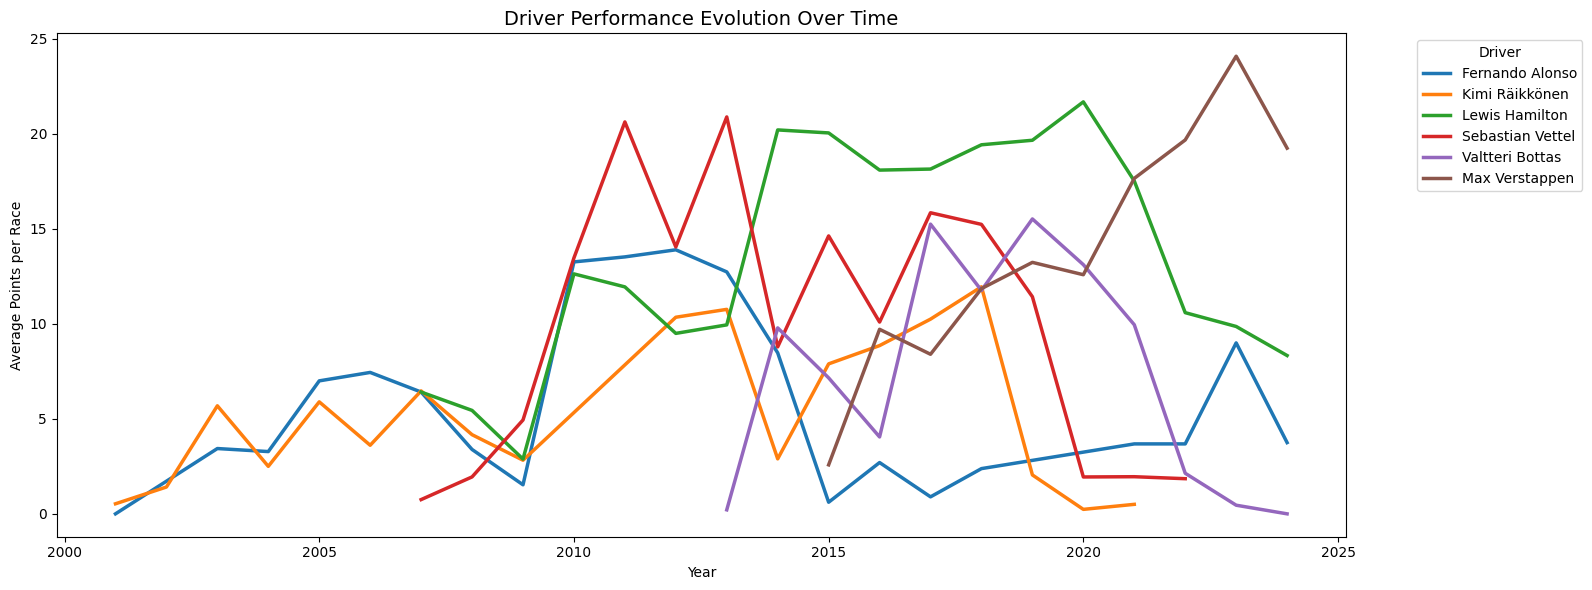

,year,driverid,total_points,avg_points_per_race,total_wins,total_podiums,races,forename,surname,Driver
2637,2001,4,0.0,0.000000,0,0,17,Fernando,Alonso,Fernando Alonso
2638,2001,8,9.0,0.529412,0,0,17,Kimi,Räikkönen,Kimi Räikkönen
2663,2002,8,24.0,1.411765,0,4,17,Kimi,Räikkönen,Kimi Räikkönen
2686,2003,4,55.0,3.437500,1,4,16,Fernando,Alonso,Fernando Alonso
2687,2003,8,91.0,5.687500,1,10,16,Kimi,Räikkönen,Kimi Räikkönen
2710,2004,4,59.0,3.277778,0,4,18,Fernando,Alonso,Fernando Alonso
2711,2004,8,45.0,2.500000,1,4,18,Kimi,Räikkönen,Kimi Räikkönen
2735,2005,4,133.0,7.000000,7,15,19,Fernando,Alonso,Fernando Alonso
2736,2005,8,112.0,5.894737,7,12,19,Kimi,Räikkönen,Kimi Räikkönen
2763,2006,4,134.0,7.444444,7,14,18,Fernando,Alonso,Fernando Alonso


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
driver_details = pd.read_csv("data/processed/Driver_Details_clean.csv")

df["win"] = (df["position"] == 1).astype(int)
df["podium"] = (df["position"] <= 3).astype(int)

# Calculate performance per year per driver 
driver_yearly = (
    df.groupby(["year", "driverid"])
    .agg(
        total_points=("points", "sum"),
        avg_points_per_race=("points", "mean"),
        total_wins=("win", "sum"),
        total_podiums=("podium", "sum"),
        races=("raceid", "count"),
    )
    .reset_index()
)

# merge with drivers
driver_yearly = driver_yearly.merge(
    driver_details[["driverid", "forename", "surname"]],
    on="driverid",
    how="left"
)
driver_yearly["Driver"] = driver_yearly["forename"] + " " + driver_yearly["surname"]

# Select top driver
top_drivers = (
    df.groupby("driverid")["points"].sum().nlargest(6).index.tolist()
)
selected_drivers = driver_yearly[driver_yearly["driverid"].isin(top_drivers)]

# plot trend
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=selected_drivers,
    x="year",
    y="avg_points_per_race",
    hue="Driver",
    linewidth=2.5
)
plt.title("Driver Performance Evolution Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Points per Race")
plt.legend(title="Driver", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# preview
display(selected_drivers.head(10))


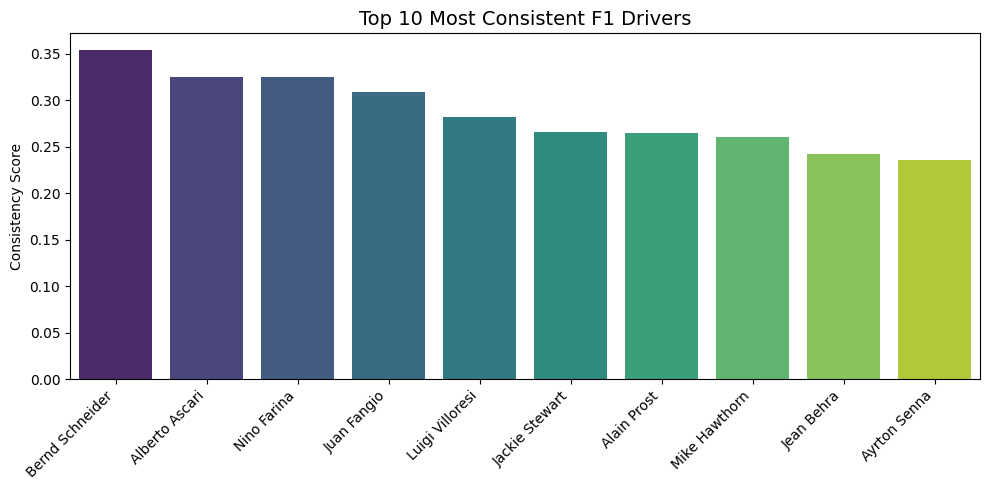

,Driver,races,avg_finish,std_finish,avg_points,consistency_score
145,Bernd Schneider,32,12.333333,0.577350,0.000000,0.354487
646,Alberto Ascari,36,2.181818,1.967265,3.888889,0.325648
641,Nino Farina,37,2.814815,1.569837,3.441351,0.325633
578,Juan Fangio,58,2.250000,2.221722,4.812759,0.309043
632,Luigi Villoresi,35,4.277778,1.673515,1.400000,0.281757
327,Jackie Stewart,100,2.952381,2.592972,3.600000,0.265667
116,Alain Prost,202,2.958042,2.605179,3.952970,0.265014
577,Mike Hawthorn,48,3.696970,2.242834,2.659167,0.260638
553,Jean Behra,57,4.920000,2.158703,0.894737,0.242752
101,Ayrton Senna,162,3.148148,3.353934,3.790123,0.235374


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
driver_details = pd.read_csv("data/processed/Driver_Details_clean.csv")


df["position"] = pd.to_numeric(df["position"], errors="coerce")

# Calculate consistency metrics per driver
driver_consistency = (
    df.groupby("driverid")
    .agg(
        races=("raceid", "count"),
        avg_finish=("position", "mean"),
        std_finish=("position", "std"),
        avg_points=("points", "mean"),
        total_points=("points", "sum")
    )
    .reset_index()
)

# merge with drivers
driver_consistency = driver_consistency.merge(
    driver_details[["driverid", "forename", "surname"]],
    on="driverid",
    how="left"
)
driver_consistency["Driver"] = driver_consistency["forename"] + " " + driver_consistency["surname"]

# Filter drivers with a minimum of 30 races
driver_consistency = driver_consistency[driver_consistency["races"] >= 30]

driver_consistency["consistency_score"] = (
    (1 / (1 + driver_consistency["std_finish"])) * 0.5 +
    (1 / (1 + driver_consistency["avg_finish"])) * 0.5
)

# top 10 driver
top_consistent = driver_consistency.sort_values("consistency_score", ascending=False).head(10)

# Plot Top 10 Most Consistent Drivers
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_consistent,
    x="Driver",
    y="consistency_score",
    palette="viridis"
)
plt.title("Top 10 Most Consistent F1 Drivers", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Consistency Score")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Preview
display(top_consistent[["Driver", "races", "avg_finish", "std_finish", "avg_points", "consistency_score"]])


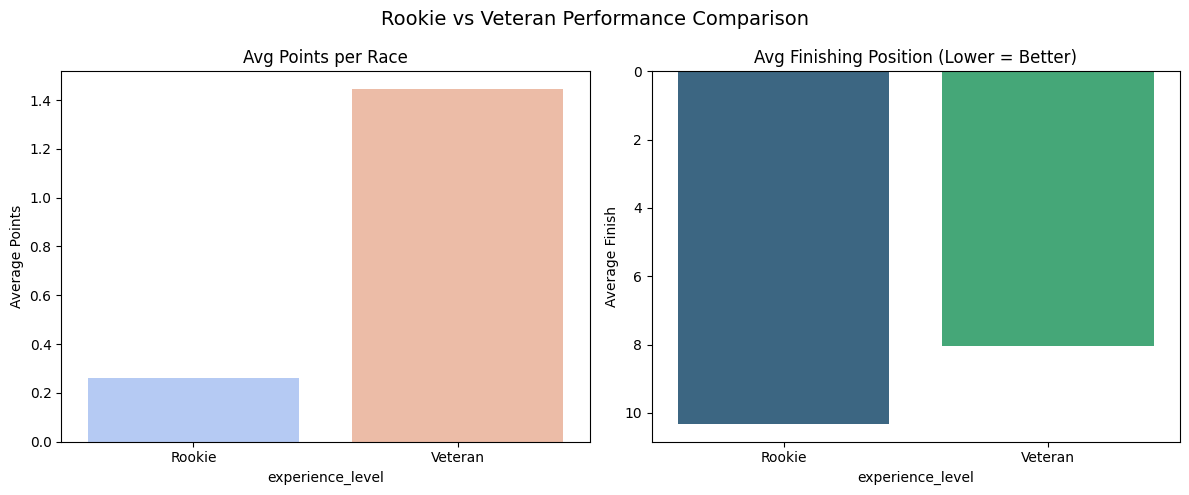

,experience_level,avg_finish,avg_points,races
0,Rookie,10.322357,0.258862,3924
1,Veteran,8.046161,1.445703,22595


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
driver_details = pd.read_csv("data/processed/Driver_Details_clean.csv")

df["position"] = pd.to_numeric(df["position"], errors="coerce")
df["points"] = pd.to_numeric(df["points"], errors="coerce")

# Count the number of races per driver per year
driver_year_stats = (
    df.groupby(["driverid", "year"])
    .agg(
        races=("raceid", "count"),
        avg_position=("position", "mean"),
        total_points=("points", "sum"),
        avg_points=("points", "mean")
    )
    .reset_index()
)

# rookie year per driver
first_year = driver_year_stats.groupby("driverid")["year"].min().reset_index()
first_year.columns = ["driverid", "rookie_year"]

driver_year_stats = driver_year_stats.merge(first_year, on="driverid", how="left")

driver_year_stats["experience_level"] = driver_year_stats.apply(
    lambda row: "Rookie" if row["year"] == row["rookie_year"] else "Veteran",
    axis=1
)

driver_year_stats = driver_year_stats.merge(
    driver_details[["driverid", "forename", "surname"]],
    on="driverid",
    how="left"
)
driver_year_stats["Driver"] = driver_year_stats["forename"] + " " + driver_year_stats["surname"]

# Rookie vs Veteran
rookie_vs_veteran = (
    driver_year_stats.groupby("experience_level")
    .agg(
        avg_finish=("avg_position", "mean"),
        avg_points=("avg_points", "mean"),
        races=("races", "sum")
    )
    .reset_index()
)

# Visualisation 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=rookie_vs_veteran,
    x="experience_level",
    y="avg_points",
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Avg Points per Race")
axes[0].set_ylabel("Average Points")

sns.barplot(
    data=rookie_vs_veteran,
    x="experience_level",
    y="avg_finish",
    palette="viridis",
    ax=axes[1]
)
axes[1].invert_yaxis()  
axes[1].set_title("Avg Finishing Position (Lower = Better)")
axes[1].set_ylabel("Average Finish")

plt.suptitle("Rookie vs Veteran Performance Comparison", fontsize=14)
plt.tight_layout()
plt.show()

display(rookie_vs_veteran)


##### Constructor Analysis 

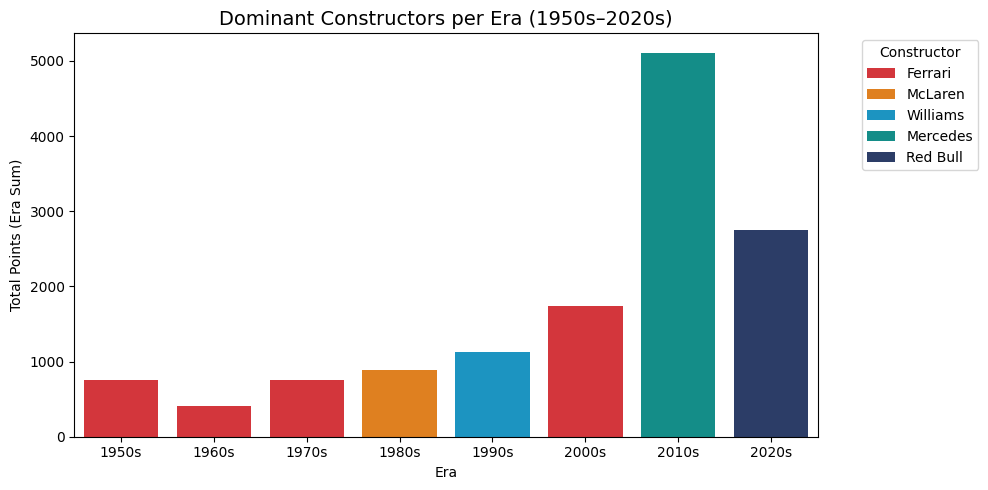

,era,name,points
0,1950s,Ferrari,754.27
70,1960s,Ferrari,404.00
143,1970s,Ferrari,751.50
195,1980s,McLaren,887.50
227,1990s,Williams,1121.00
264,2000s,Ferrari,1737.00
291,2010s,Mercedes,5112.00
305,2020s,Red Bull,2747.50


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
team_details = pd.read_csv("data/processed/Team_Details_clean.csv")

df["points"] = pd.to_numeric(df["points"], errors="coerce")

# classification
def classify_era(year):
    if 1950 <= year <= 1959: return "1950s"
    elif 1960 <= year <= 1969: return "1960s"
    elif 1970 <= year <= 1979: return "1970s"
    elif 1980 <= year <= 1989: return "1980s"
    elif 1990 <= year <= 1999: return "1990s"
    elif 2000 <= year <= 2009: return "2000s"
    elif 2010 <= year <= 2019: return "2010s"
    else: return "2020s"

df["era"] = df["year"].apply(classify_era)

# Total points per constructor per era
era_dominance = (
    df.groupby(["era", "constructorid"])["points"]
    .sum()
    .reset_index()
)

# Combine with the constructor name
era_dominance = era_dominance.merge(
    team_details[["constructorid", "name"]],
    left_on="constructorid",
    right_on="constructorid",
    how="left"
)

# Pick the top constructor of each era
color_palette = {
    "Ferrari": "#ED1C24",
    "McLaren": "#FF8000",
    "Mercedes": "#00A19B",
    "Red Bull": "#223971",
    "Williams": "#00A0DD"
}


top_per_era = era_dominance.loc[era_dominance.groupby("era")["points"].idxmax()]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_per_era, x="era", y="points", hue="name", dodge=False, palette=color_palette)
plt.title("Dominant Constructors per Era (1950s–2020s)", fontsize=14)
plt.ylabel("Total Points (Era Sum)")
plt.xlabel("Era")
plt.legend(title="Constructor", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

display(top_per_era[["era", "name", "points"]])


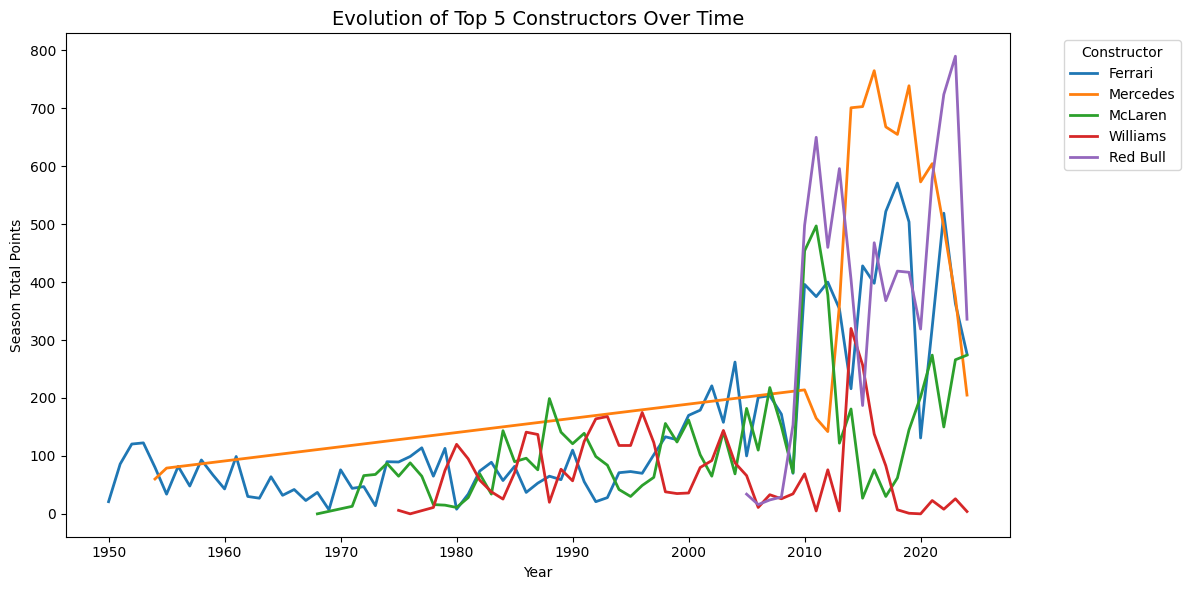

In [ ]:
# Average points per constructor per year
constructor_trend = (
    df.groupby(["year", "constructorid"])["points"]
    .sum()
    .reset_index()
)

constructor_trend = constructor_trend.merge(
    team_details[["constructorid", "name"]],
    left_on="constructorid",
    right_on="constructorid",
    how="left"
)

# Top 5 constructor based on points
top_5 = constructor_trend.groupby("name")["points"].sum().nlargest(5).index
trend_top5 = constructor_trend[constructor_trend["name"].isin(top_5)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_top5, x="year", y="points", hue="name", linewidth=2)
plt.title("Evolution of Top 5 Constructors Over Time", fontsize=14)
plt.ylabel("Season Total Points")
plt.xlabel("Year")
plt.legend(title="Constructor", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


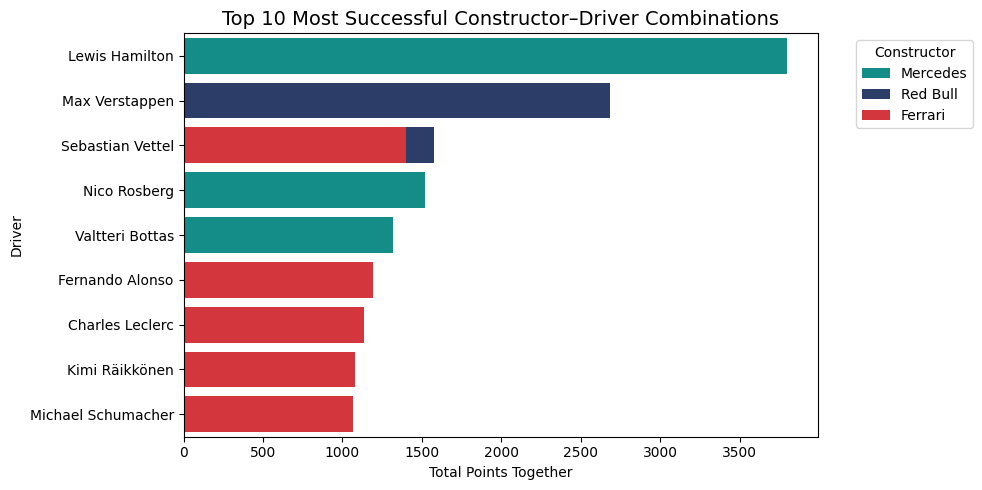

,Driver,name,points
1614,Lewis Hamilton,Mercedes,3800.5
281,Max Verstappen,Red Bull,2682.5
274,Sebastian Vettel,Red Bull,1577.0
1615,Nico Rosberg,Mercedes,1519.0
163,Sebastian Vettel,Ferrari,1400.0
1624,Valtteri Bottas,Mercedes,1320.0
160,Fernando Alonso,Ferrari,1190.0
256,Charles Leclerc,Ferrari,1133.0
161,Kimi Räikkönen,Ferrari,1080.0
166,Michael Schumacher,Ferrari,1066.0


In [ ]:
# Calculate the total points based on the driver–constructor combination
combo_success = (
    df.groupby(["constructorid", "driverid"])["points"]
    .sum()
    .reset_index()
)

driver_details = pd.read_csv("data/processed/Driver_Details_clean.csv")

combo_success = (
    combo_success.merge(
        team_details[["constructorid", "name"]],
        left_on="constructorid",
        right_on="constructorid",
        how="left"
    )
    .merge(
        driver_details[["driverid", "forename", "surname"]],
        on="driverid",
        how="left"
    )
)

combo_success["Driver"] = combo_success["forename"] + " " + combo_success["surname"]

color_palette = {
    "Ferrari": "#ED1C24",
    "McLaren": "#FF8000",
    "Mercedes": "#00A19B",
    "Red Bull": "#223971",
    "Williams": "#00A0DD"
}

top_combos = combo_success.nlargest(10, "points")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_combos,
    y="Driver",
    x="points",
    hue="name",
    palette=color_palette,
    dodge=False
)
plt.title("Top 10 Most Successful Constructor–Driver Combinations", fontsize=14)
plt.xlabel("Total Points Together")
plt.ylabel("Driver")
plt.legend(title="Constructor", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

display(top_combos[["Driver", "name", "points"]])


##### Race & Circuit Analysis 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
print(df)


       resultid  raceid  driverid  constructorid number_x  grid  position  \
0             1      18         1              1       22     1       1.0   
1             2      18         2              2        3     5       2.0   
2             3      18         3              3        7     7       3.0   
3             4      18         4              4        5    11       4.0   
4             5      18         5              1       23     3       5.0   
...         ...     ...       ...            ...      ...   ...       ...   
26514     26520    1132       839            214       31    18      16.0   
26515     26521    1132       815              9       11     0      17.0   
26516     26522    1132       855             15       24    14      18.0   
26517     26523    1132       847            131       63     1       NaN   
26518     26524    1132       842            214       10    19       NaN   

      positiontext  positionorder  points  laps       time_x milliseconds  

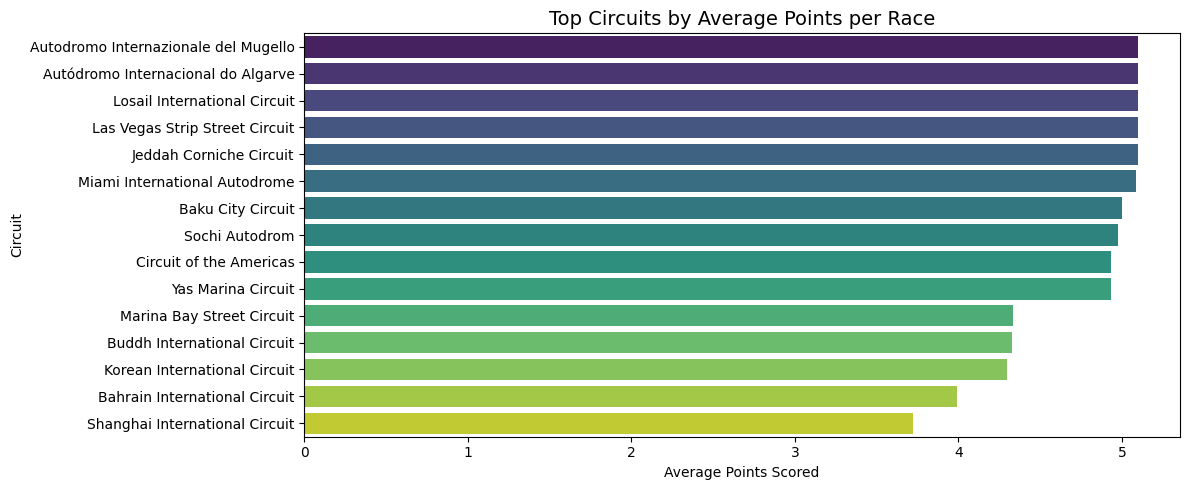

In [ ]:
# Average points per winner per circuit
circuit_perf = (
    df.groupby("name")["points"]
    .mean()
    .reset_index()
    .sort_values("points", ascending=False)
)

plt.figure(figsize=(12, 5))
sns.barplot(data=circuit_perf.head(15), x="points", y="name", palette="viridis")
plt.title("Top Circuits by Average Points per Race", fontsize=14)
plt.xlabel("Average Points Scored")
plt.ylabel("Circuit")
plt.tight_layout()
plt.show()


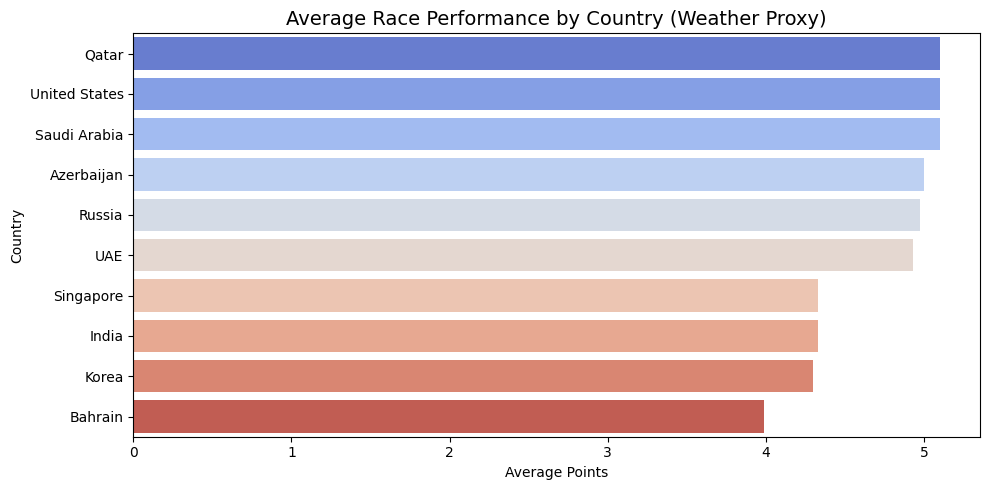

In [ ]:
# Average points per country (proxy: geographical conditions & weather)
country_weather_proxy = (
    df.groupby("country")["points"]
    .mean()
    .reset_index()
    .sort_values("points", ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_weather_proxy.head(10), x="points", y="country", palette="coolwarm")
plt.title("Average Race Performance by Country (Weather Proxy)", fontsize=14)
plt.xlabel("Average Points")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


##### Strategy Analysis 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/processed/F1_Integrated_Features.csv")

df = df.copy()
df = df[df["position"].notna()]  
df["position"] = df["position"].astype(float)
df["grid"] = df["grid"].astype(float)
df["points"] = df["points"].astype(float)



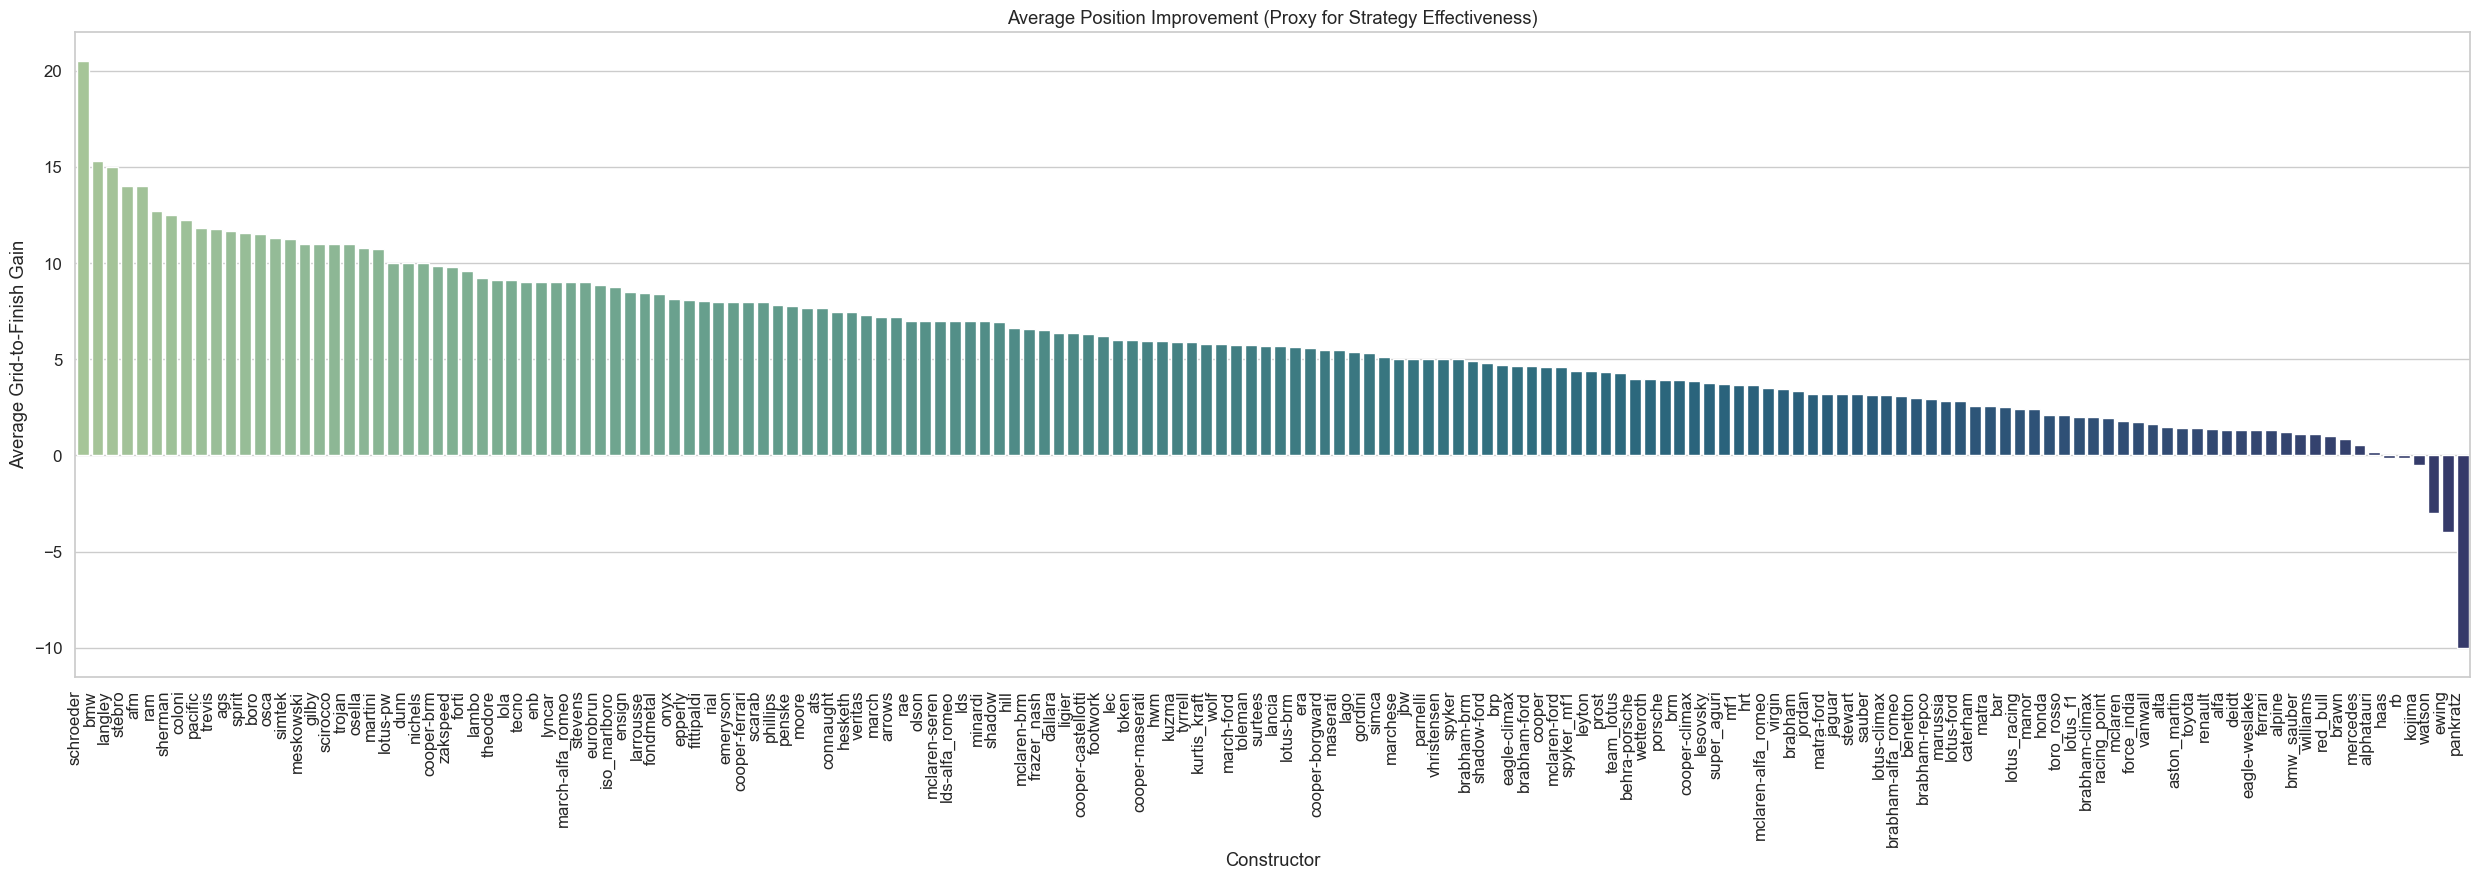

In [ ]:

# PIT STOP STRATEGY EFFECTIVENESS 

df["position_change"] = df["grid"] - df["position"]

avg_improvement = df.groupby("constructorref")["position_change"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(25, 9))
sns.barplot(x="constructorref", y="position_change", data=avg_improvement, palette="crest")
plt.xticks(rotation=90, ha='right')
plt.title("Average Position Improvement (Proxy for Strategy Effectiveness)")
plt.ylabel("Average Grid-to-Finish Gain")
plt.xlabel("Constructor")
plt.tight_layout()
plt.show()



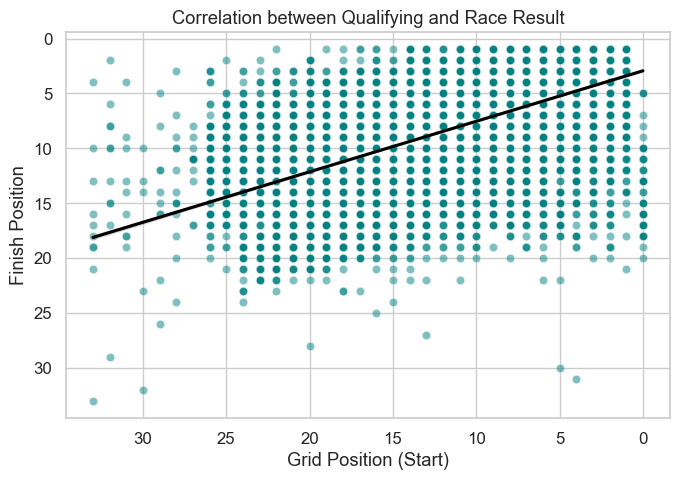

📈 Correlation between grid and finish position: 0.639
➡️ Moderate correlation: grid position has noticeable impact.


In [ ]:
# QUALIFYING POSITION vs RACE RESULT CORRELATION

plt.figure(figsize=(7, 5))
sns.scatterplot(x="grid", y="position", alpha=0.5, data=df, color="teal")
sns.regplot(x="grid", y="position", data=df, scatter=False, color="black")
plt.title("Correlation between Qualifying and Race Result")
plt.xlabel("Grid Position (Start)")
plt.ylabel("Finish Position")
plt.gca().invert_xaxis()  # grid 1 = pole/grid position
plt.gca().invert_yaxis()  # position 1 = race/finish winner
plt.tight_layout()
plt.show()

corr = df["grid"].corr(df["position"])
print(f"Correlation between grid and finish position: {corr:.3f}")
if corr > 0.7:
    print("Strong correlation: starting position greatly influences finishing result.")
elif corr > 0.4:
    print("Moderate correlation: grid position has noticeable impact.")
else:
    print("Weak correlation: races are more unpredictable.")

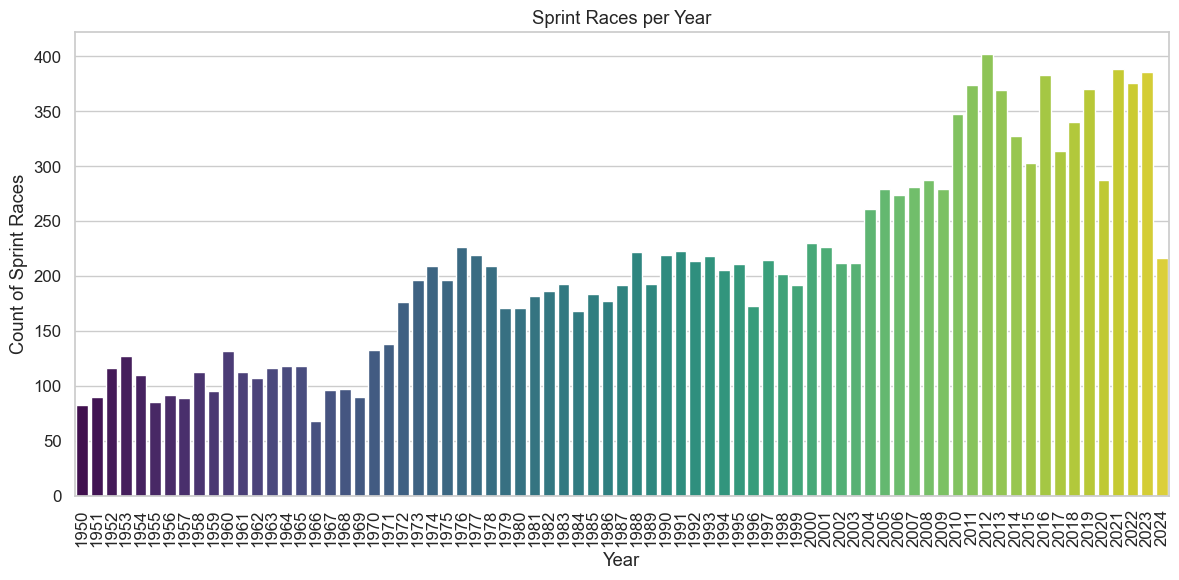

In [ ]:
# SPRINT RACE IMPACT ON MAIN RACE

if "sprint_date" in df.columns:
    sprint_summary = df.groupby("year")["round"].count().reset_index(name="sprint_count")
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sprint_summary, x="year", y="sprint_count", palette="viridis")
    plt.title("Sprint Races per Year")
    plt.ylabel("Count of Sprint Races")
    plt.xlabel("Year")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Jika Kolom 'sprint_date' belum berisi nilai valid, maka sprint analysis dilewati.")


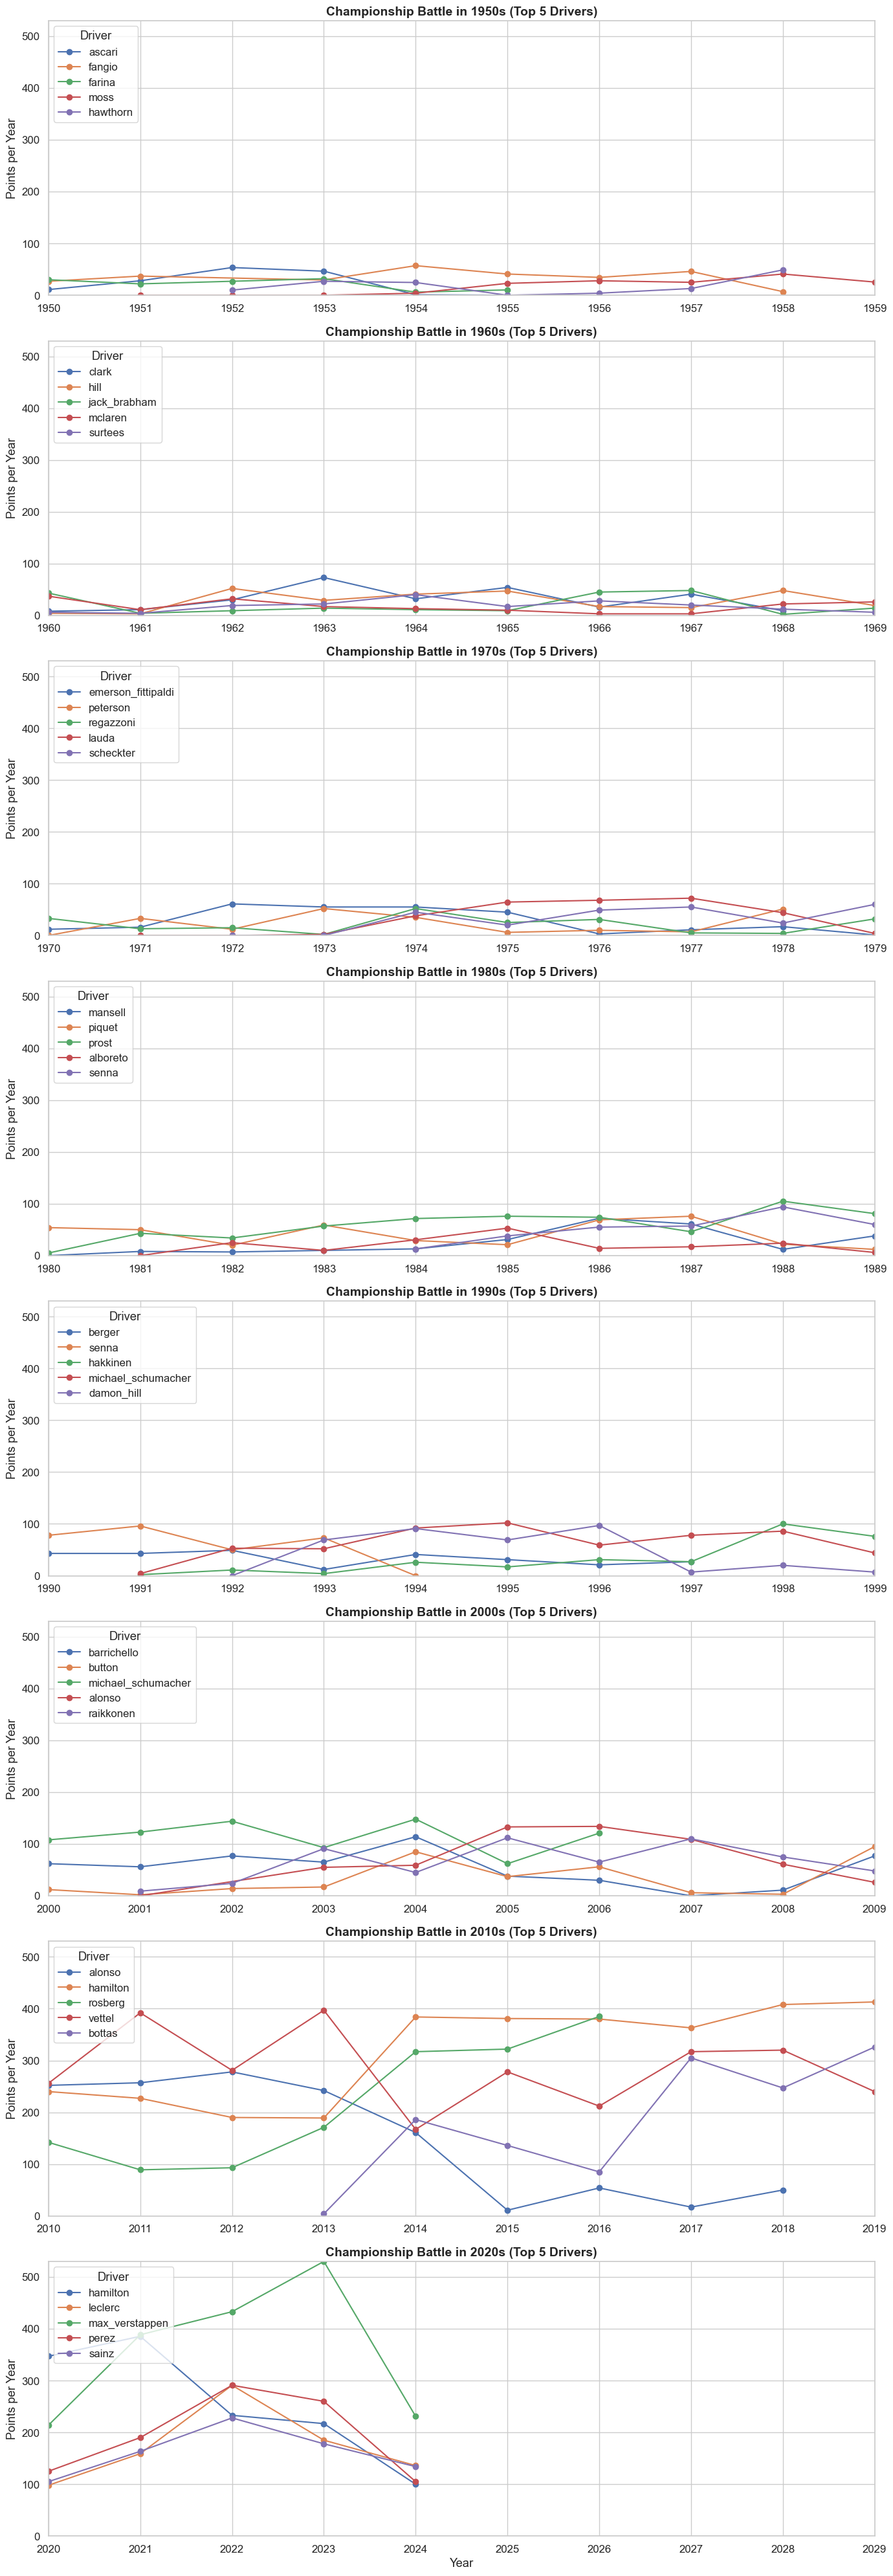

In [ ]:
# CHAMPIONSHIP BATTLE ANALYSIS per DECADE

f1 = pd.read_csv("data/processed/F1_Integrated_Features.csv")

f1 = f1.dropna(subset=["year", "points"])
f1["year"] = f1["year"].astype(int)

def get_decade(year):
    return f"{year//10*10}s"

f1["decade"] = f1["year"].apply(get_decade)

driver_year_points = (
    f1.groupby(["year", "driverref"])["points"]
    .sum()
    .reset_index()
)

driver_year_points["decade"] = driver_year_points["year"].apply(get_decade)

top5_per_decade = (
    driver_year_points.groupby(["decade", "driverref"])["points"]
    .sum()
    .reset_index()
    .sort_values(["decade", "points"], ascending=[True, False])
    .groupby("decade")
    .head(5)
)

# Filter data 
filtered_data = driver_year_points.merge(top5_per_decade[["decade", "driverref"]], on=["decade", "driverref"])

max_points = filtered_data["points"].max()

sns.set(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(len(decades), 1, figsize=(14, 5*len(decades)), sharex=False)

for i, decade in enumerate(decades):
    ax = axes[i]
    data = filtered_data[filtered_data["decade"] == decade]

    
    decade_start = int(decade[:4])
    decade_end = decade_start + 9

    for driver in data["driverref"].unique():
        driver_data = data[data["driverref"] == driver]
        ax.plot(driver_data["year"], driver_data["points"], marker="o", label=driver)

    ax.set_title(f"Championship Battle in {decade} (Top 5 Drivers)", fontsize=14, weight="bold")
    ax.set_ylabel("Points per Year")
    ax.set_ylim(0, max_points)
    ax.set_xlim(decade_start, decade_end)
    ax.legend(title="Driver", loc="upper left")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


